C:\Users\SHINAU\AppData\Local\Temp\ipykernel_8720\4065391056.py:18: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(response.text)


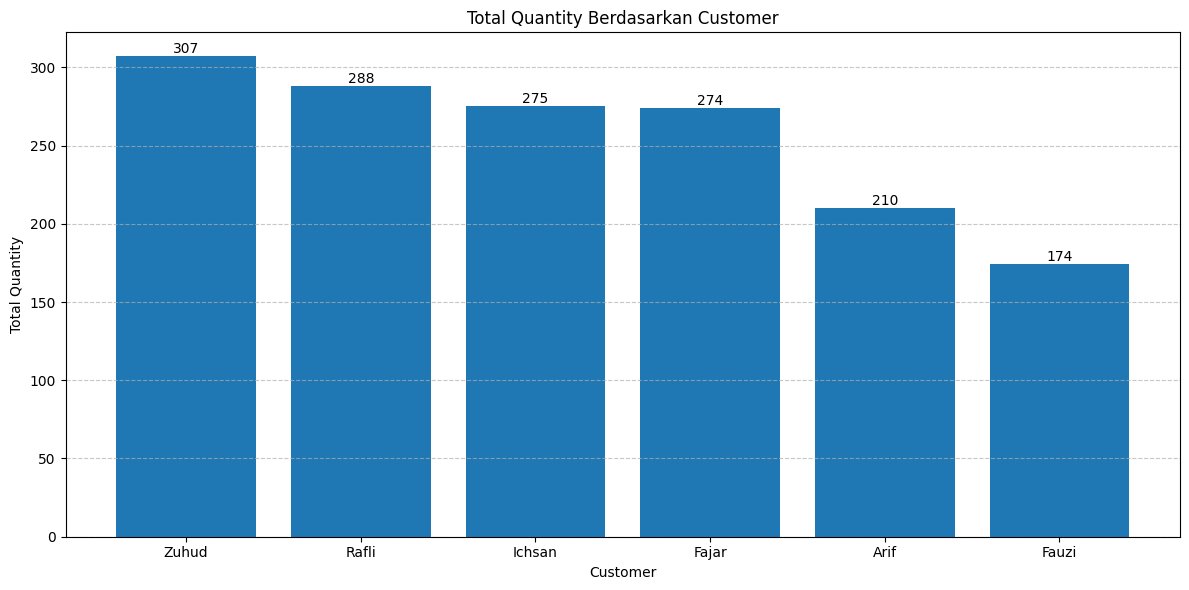

C:\Users\SHINAU\AppData\Local\Temp\ipykernel_8720\4065391056.py:60: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_customer_quantity = data.groupby([data['date'].dt.to_period('M'), 'customer'])['quantity'].sum().reset_index()



Analisis Quantity Berdasarkan Customer:
Total quantity: 1,528
Rata-rata quantity per customer: 255
Quantity tertinggi: 307 oleh Zuhud
Quantity terendah: 174 oleh Fauzi


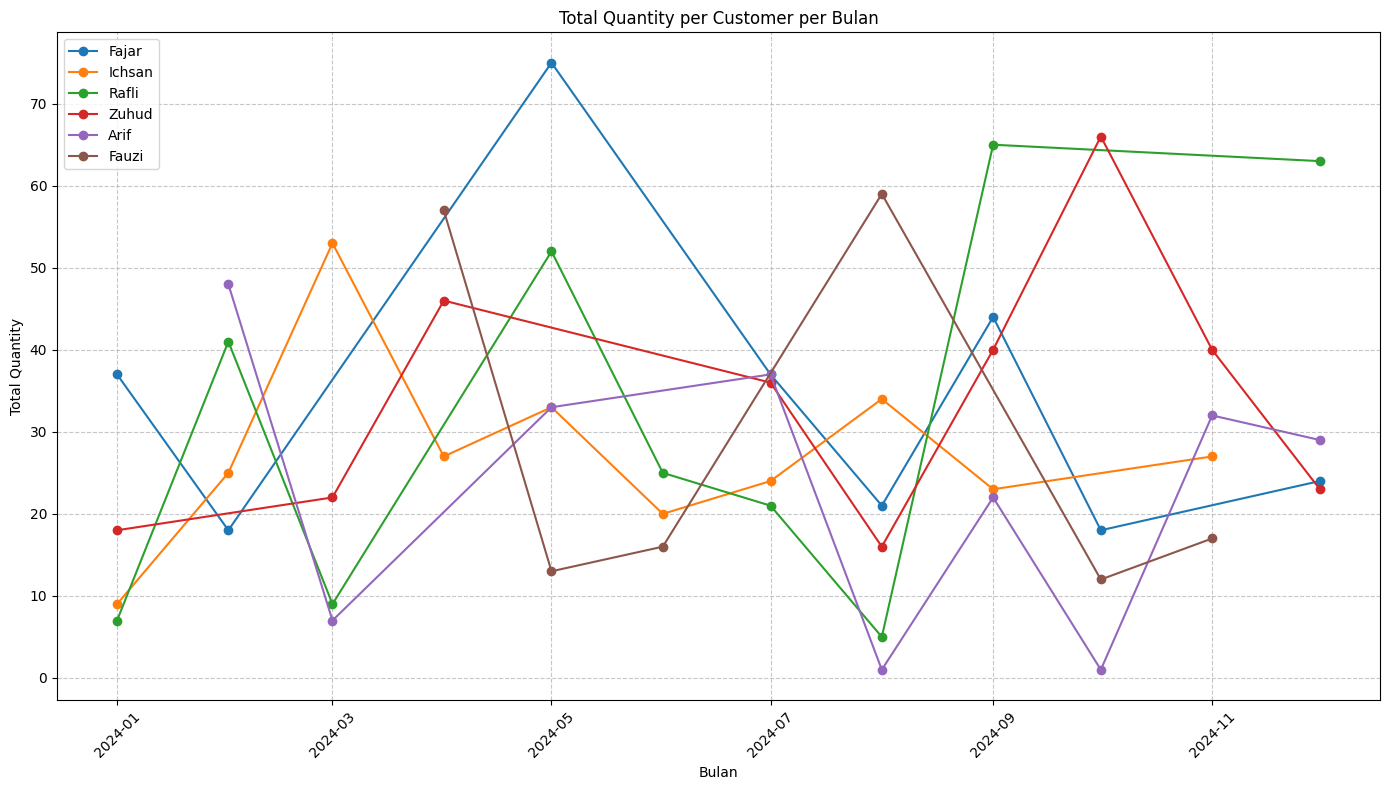


Analisis Quantity Bulanan:
Total quantity: 1,528
Rata-rata quantity bulanan: 127
Quantity bulanan tertinggi: 206 pada May 2024
Quantity bulanan terendah: 61 pada June 2024


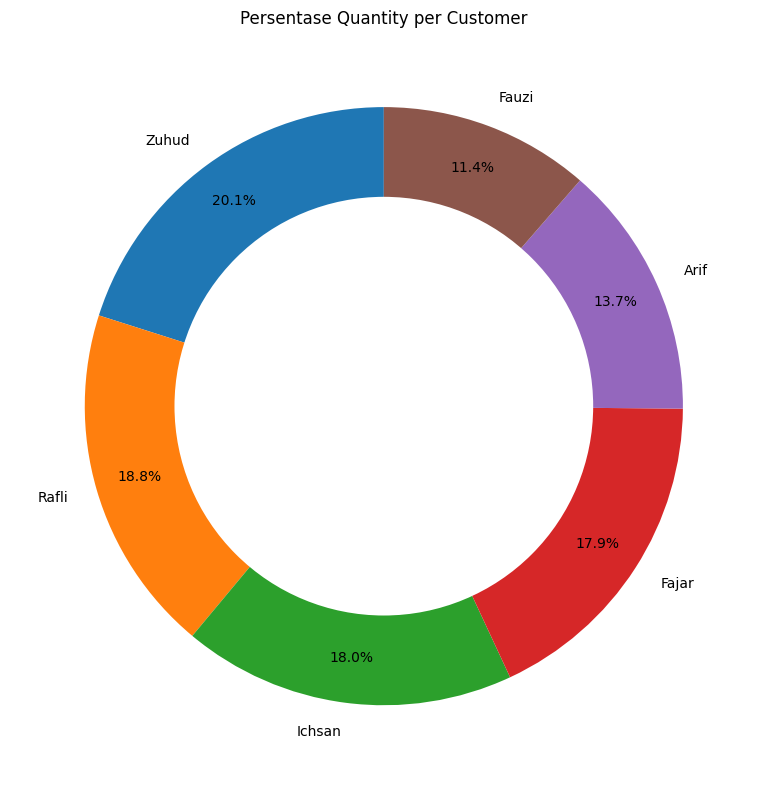


Analisis Persentase Quantity per Customer:
Total quantity: 1,528
Customer dengan persentase quantity tertinggi: Zuhud (20.1%)
Customer dengan persentase quantity terendah: Fauzi (11.4%)


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk memformat angka
def format_number(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'
    
# Mengambil data dari API
response = requests.get("http://localhost:3000/api/sales")
data = pd.read_json(response.text)

# Mengubah kolom 'date' menjadi tipe datetime
data['date'] = pd.to_datetime(data['date'])

## Analisis Quantity Berdasarkan Customer (Grafik Batang)
# Menghitung total quantity per customer
customer_quantity = data.groupby('customer')['quantity'].sum().sort_values(ascending=False).reset_index()

# Membuat grafik batang untuk quantity per customer
plt.figure(figsize=(12, 6))
bars = plt.bar(customer_quantity['customer'], customer_quantity['quantity'])
plt.title('Total Quantity Berdasarkan Customer')
plt.xlabel('Customer')
plt.ylabel('Total Quantity')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Menambahkan angka pada atas chart
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{format_number(height, 0)}',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Analisis quantity tertinggi dan terendah
max_quantity = customer_quantity['quantity'].max()
min_quantity = customer_quantity['quantity'].min()
max_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmax(), 'customer']
min_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmin(), 'customer']

# Menampilkan hasil analisis
print("\nAnalisis Quantity Berdasarkan Customer:")
print(f"Total quantity: {customer_quantity['quantity'].sum():,}")
print(f"Rata-rata quantity per customer: {customer_quantity['quantity'].mean():,.0f}")
print(f"Quantity tertinggi: {max_quantity:,} oleh {max_quantity_customer}")
print(f"Quantity terendah: {min_quantity:,} oleh {min_quantity_customer}")

## Analisis Quantity Berdasarkan Customer per Bulan (Grafik Garis)
# Menghitung total quantity per customer per bulan
monthly_customer_quantity = data.groupby([data['date'].dt.to_period('M'), 'customer'])['quantity'].sum().reset_index()
monthly_customer_quantity['date'] = monthly_customer_quantity['date'].dt.to_timestamp()

# Membuat grafik garis untuk quantity per customer per bulan
plt.figure(figsize=(14, 8))
for customer in monthly_customer_quantity['customer'].unique():
    customer_data = monthly_customer_quantity[monthly_customer_quantity['customer'] == customer]
    plt.plot(customer_data['date'], customer_data['quantity'], label=customer, marker='o')

plt.title('Total Quantity per Customer per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis quantity tertinggi dan terendah per bulan
max_monthly_quantity = monthly_customer_quantity.groupby('date')['quantity'].sum().max()
min_monthly_quantity = monthly_customer_quantity.groupby('date')['quantity'].sum().min()
max_monthly_date = monthly_customer_quantity.groupby('date')['quantity'].sum().idxmax()
min_monthly_date = monthly_customer_quantity.groupby('date')['quantity'].sum().idxmin()

# Menampilkan hasil analisis
print("\nAnalisis Quantity Bulanan:")
print(f"Total quantity: {monthly_customer_quantity['quantity'].sum():,}")
print(f"Rata-rata quantity bulanan: {monthly_customer_quantity.groupby('date')['quantity'].sum().mean():,.0f}")
print(f"Quantity bulanan tertinggi: {max_monthly_quantity:,} pada {max_monthly_date.strftime('%B %Y')}")
print(f"Quantity bulanan terendah: {min_monthly_quantity:,} pada {min_monthly_date.strftime('%B %Y')}")

## Analisis Persentase Quantity per Customer (Grafik Donat)
# Menghitung persentase quantity per customer
total_quantity = customer_quantity['quantity'].sum()
customer_quantity['percentage'] = customer_quantity['quantity'] / total_quantity * 100

# Membuat grafik pie chart
plt.figure(figsize=(12, 8))
plt.pie(customer_quantity['percentage'], labels=customer_quantity['customer'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Persentase Quantity per Customer')

# Menambahkan lingkaran di tengah untuk membuat donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

# Menampilkan hasil analisis
print("\nAnalisis Persentase Quantity per Customer:")
print(f"Total quantity: {total_quantity:,}")
print(f"Customer dengan persentase quantity tertinggi: {max_quantity_customer} ({customer_quantity.loc[customer_quantity['quantity'].idxmax(), 'percentage']:.1f}%)")
print(f"Customer dengan persentase quantity terendah: {min_quantity_customer} ({customer_quantity.loc[customer_quantity['quantity'].idxmin(), 'percentage']:.1f}%)")